In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the preprocessed dataset
file_path = 'data/preprocessed_combined_dataset.csv'  # Replace with your dataset's path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify
data.head()


C:\Users\linke\AppData\Local\Temp\ipykernel_4776\952954815.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,order_id,order_date,status,item_id,sku,qty_ordered,price_x,value,discount_amount,total,...,productURL,stars,reviews,price_y,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,100354678,2020-01-10,received,574772,oasis_Oasis-064-36,4.5,89.9,1798.0,0.0,1798.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100354678,2020-01-10,received,574774,Fantastic_FT-48,4.5,19.0,190.0,0.0,190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100354680,2020-01-10,complete,574777,mdeal_DMC-610-8,4.5,149.9,1199.2,0.0,1199.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100354680,2020-01-10,complete,574779,oasis_Oasis-061-36,4.5,79.9,639.2,0.0,639.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100367357,NaN,received,595185,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Adjusted feature selection for clustering
numerical_columns = [
    "qty_ordered", 
    "price_x", 
    "value", 
    "total", 
    "category_encoded", 
    "discount_amount", 
    "Region_encoded_x", 
    "payment_method_encoded"
]

# Filter the dataset for the selected features and drop missing values
clustering_data = data[numerical_columns].dropna()

# Display the first few rows of the filtered data
clustering_data.head()


,qty_ordered,price_x,value,total,category_encoded,discount_amount,Region_encoded_x,payment_method_encoded
0,4.5,89.9,1798.0,1798.0,8,0.0,2,6
1,4.5,19.0,190.0,190.0,8,0.0,2,6
2,4.5,149.9,1199.2,1199.2,8,0.0,2,6
3,4.5,79.9,639.2,639.2,8,0.0,2,6
4,2.0,99.9,99.9,99.9,8,0.0,2,6


In [5]:
# Step 3: Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the selected features
scaled_data = scaler.fit_transform(clustering_data)

# Display the first few rows of the scaled data
print(scaled_data[:5])


[[ 2.23807681 -0.62155964  0.43994728  1.94010321  0.14126967 -0.27265382
   0.52308111  0.58933754]
 [ 2.23807681 -0.7112936  -0.33564713 -0.48671177  0.14126967 -0.27265382
   0.52308111  0.58933754]
 [ 2.23807681 -0.54562118  0.15112518  1.03638629  0.14126967 -0.27265382
   0.52308111  0.58933754]
 [ 2.23807681 -0.63421605 -0.11898233  0.19122684  0.14126967 -0.27265382
   0.52308111  0.58933754]
 [-0.46965754 -0.60890323 -0.3791055  -0.62269189  0.14126967 -0.27265382
   0.52308111  0.58933754]]


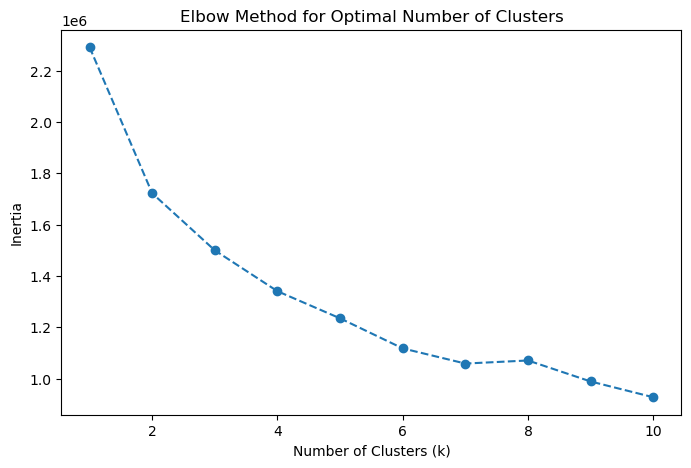

In [7]:
# Step 4: Determine optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different cluster sizes
inertia = []
range_clusters = range(1, 11)  # Check clusters from 1 to 10
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [9]:
# Step 5: Apply K-Means clustering
optimal_k = 4  # Replace with the number you decide from the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
clustering_data['Cluster'] = clusters

# Display the first few rows with cluster labels
clustering_data.head()


,qty_ordered,price_x,value,total,category_encoded,discount_amount,Region_encoded_x,payment_method_encoded,Cluster
0,4.5,89.9,1798.0,1798.0,8,0.0,2,6,0
1,4.5,19.0,190.0,190.0,8,0.0,2,6,0
2,4.5,149.9,1199.2,1199.2,8,0.0,2,6,0
3,4.5,79.9,639.2,639.2,8,0.0,2,6,0
4,2.0,99.9,99.9,99.9,8,0.0,2,6,2


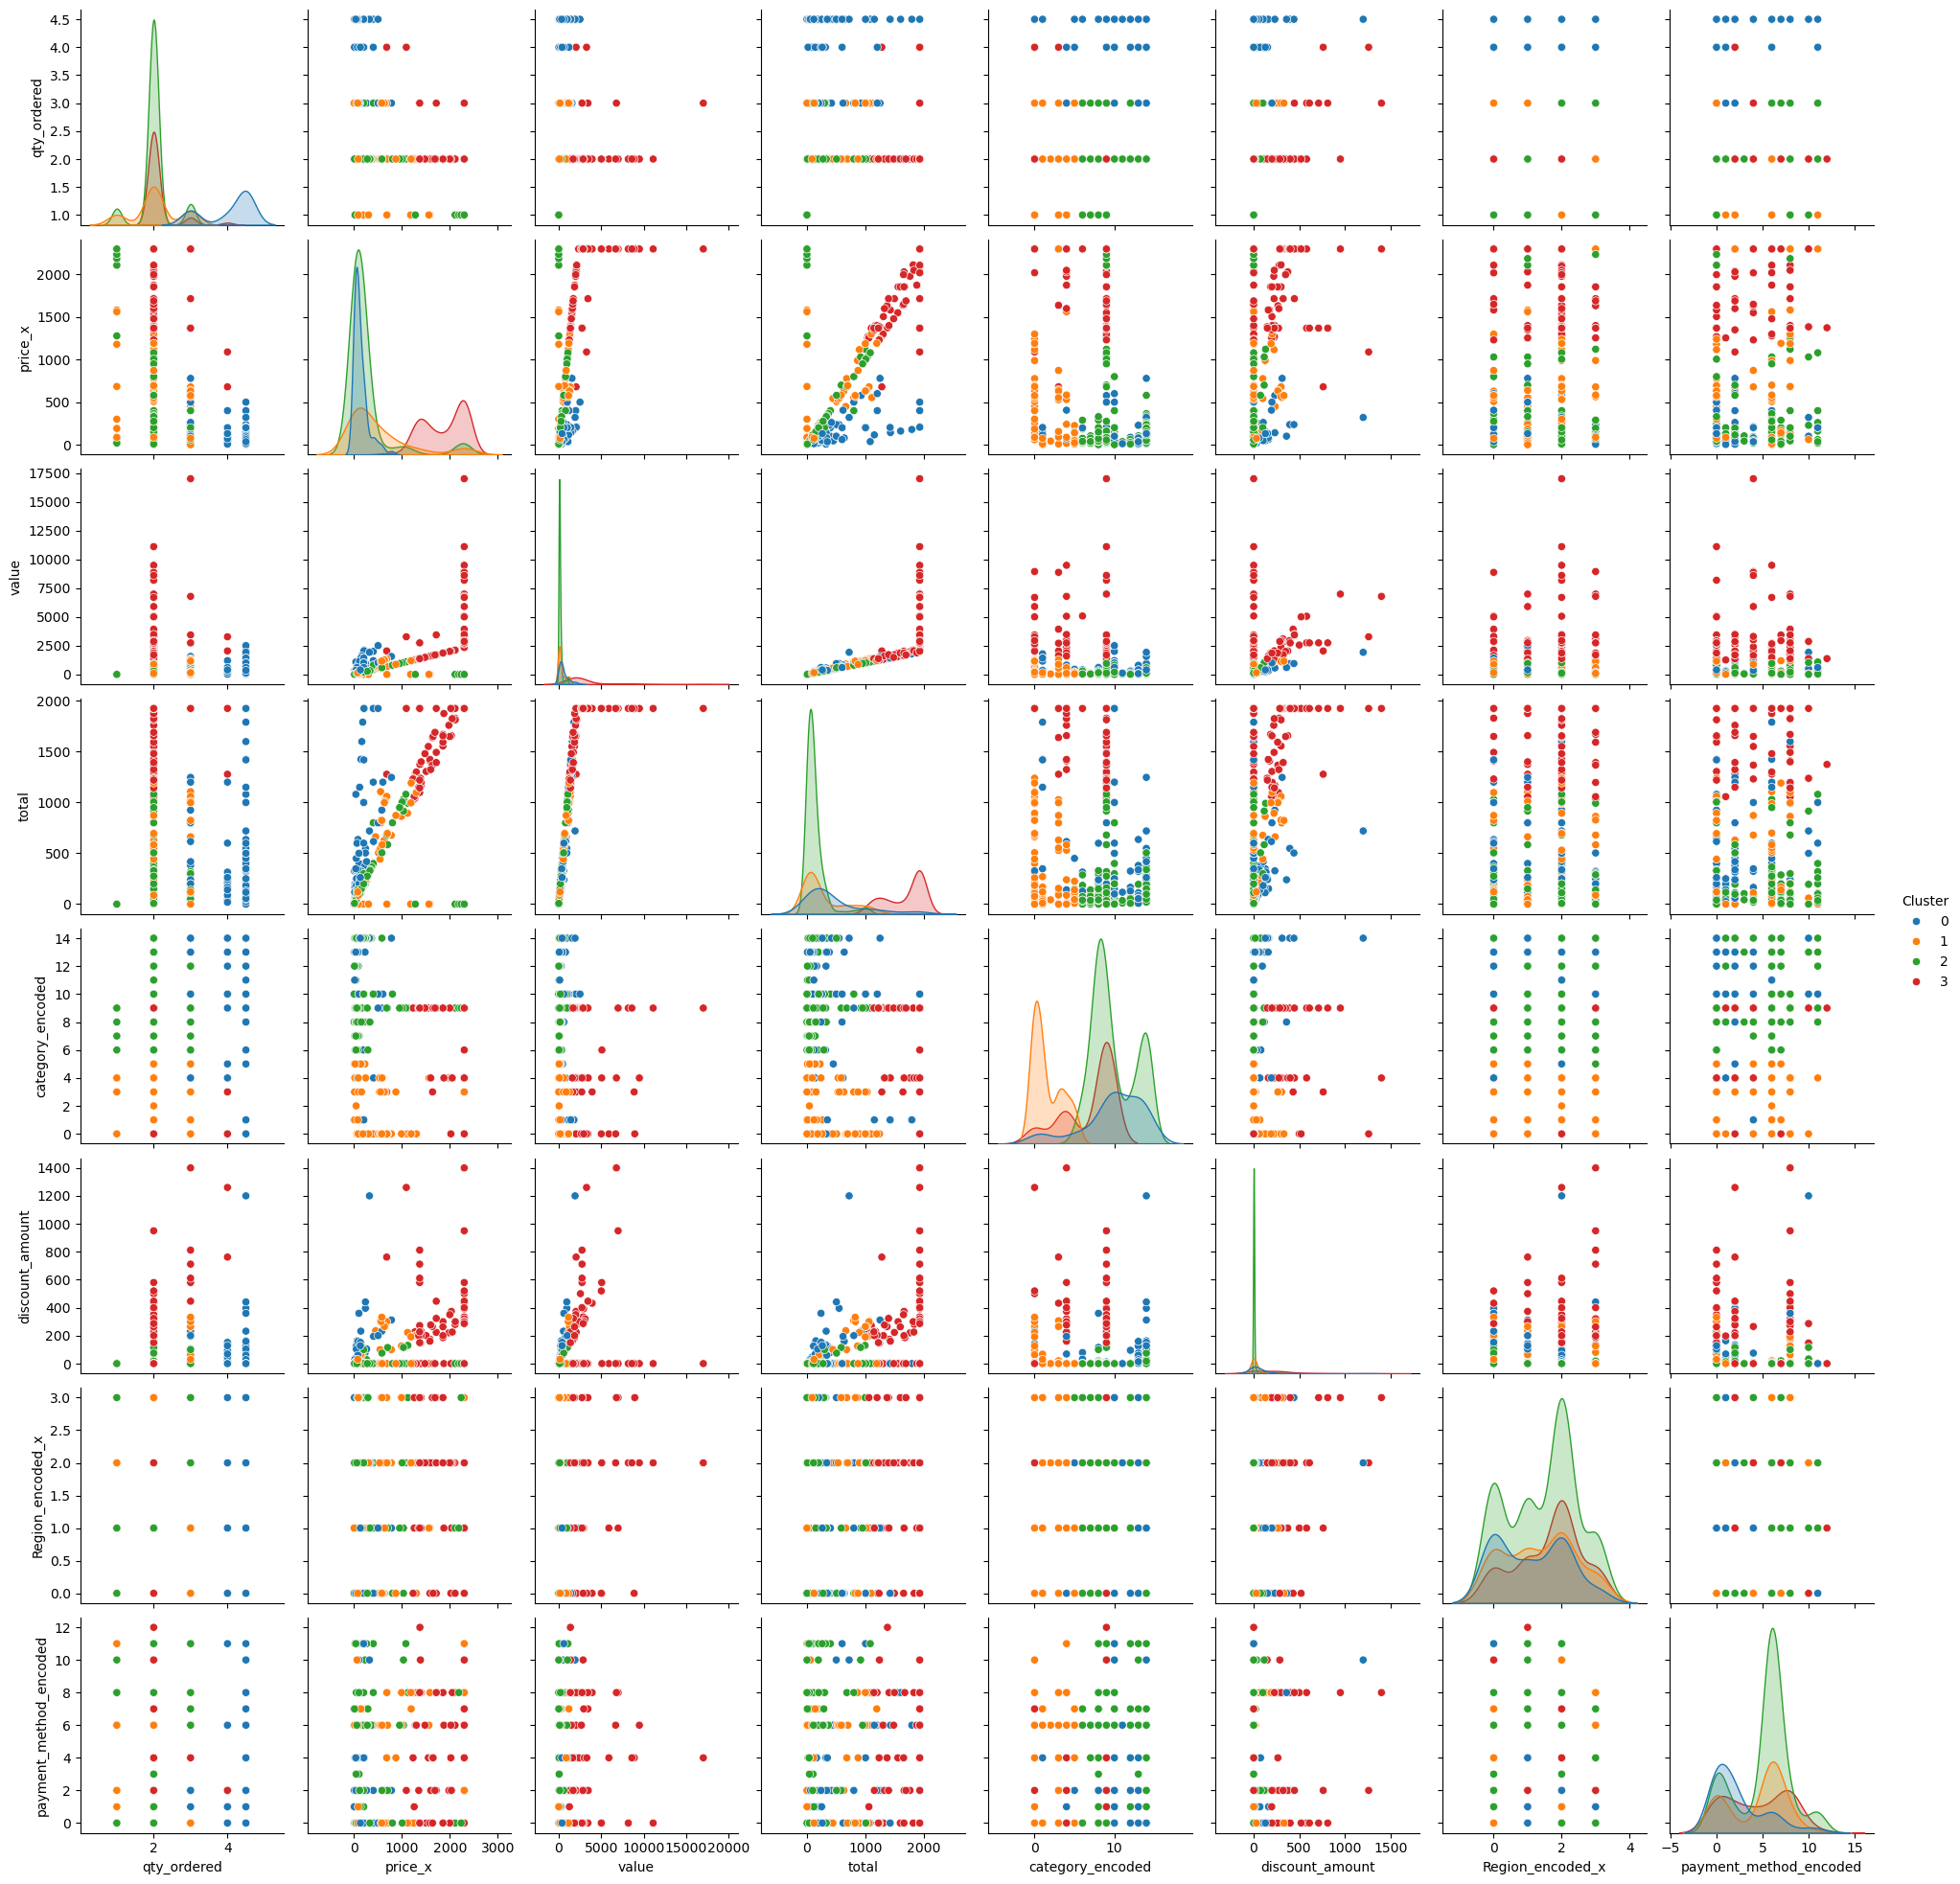

In [17]:
import seaborn as sns
# Use a smaller sample for quicker visualization
sampled_data = clustering_data.sample(n=500, random_state=42)
sns.pairplot(sampled_data, hue='Cluster', palette='tab10', diag_kind='kde')
plt.show()


C:\Users\linke\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


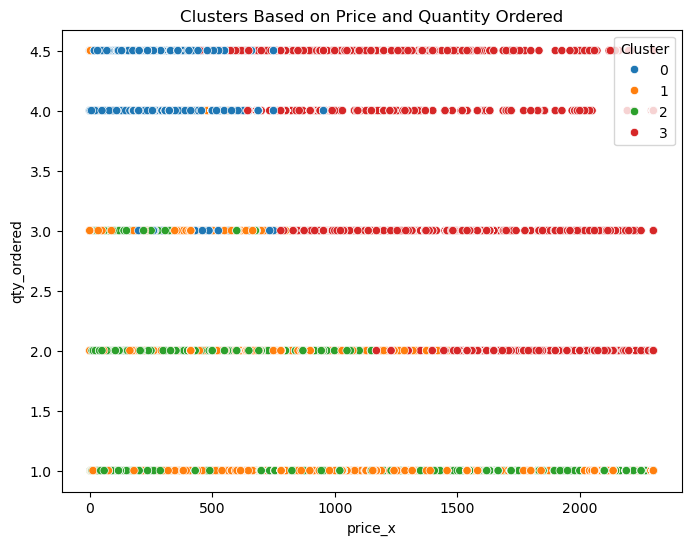

In [21]:
# Scatter plot for two specific features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clustering_data, x='price_x', y='qty_ordered', hue='Cluster', palette='tab10')
plt.title('Clusters Based on Price and Quantity Ordered')
plt.show()


In [23]:
# Step 7: Analyze cluster characteristics
cluster_summary = clustering_data.groupby('Cluster').mean()

# Display the summary of clusters
print(cluster_summary)


         qty_ordered      price_x        value        total  category_encoded  \
Cluster                                                                         
0           4.008964   123.922783   494.773408   421.133220          9.170198   
1           2.033954   476.182133   277.660318   249.412635          1.527488   
2           2.015446   243.381937   137.934336   134.009589          9.727662   
3           2.227765  1864.849519  3529.915808  1698.400651          6.991591   

         discount_amount  Region_encoded_x  payment_method_encoded  
Cluster                                                             
0              46.413998          1.405322                2.253070  
1              28.247683          1.364798                4.280102  
2               3.924747          1.464014                5.007905  
3             280.177220          1.473002                4.024156  


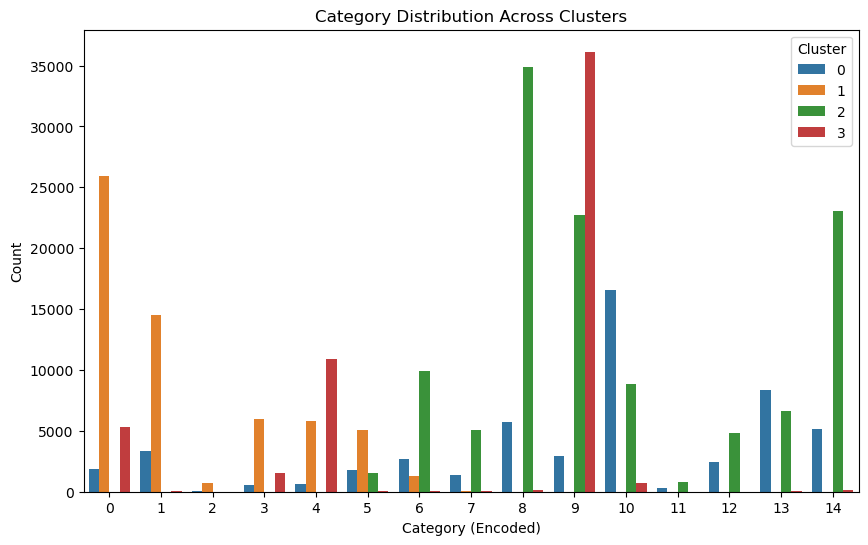

In [25]:
# Bar chart for category distribution in clusters
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=clustering_data, x='category_encoded', hue='Cluster', palette='tab10')
plt.title('Category Distribution Across Clusters')
plt.xlabel('Category (Encoded)')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


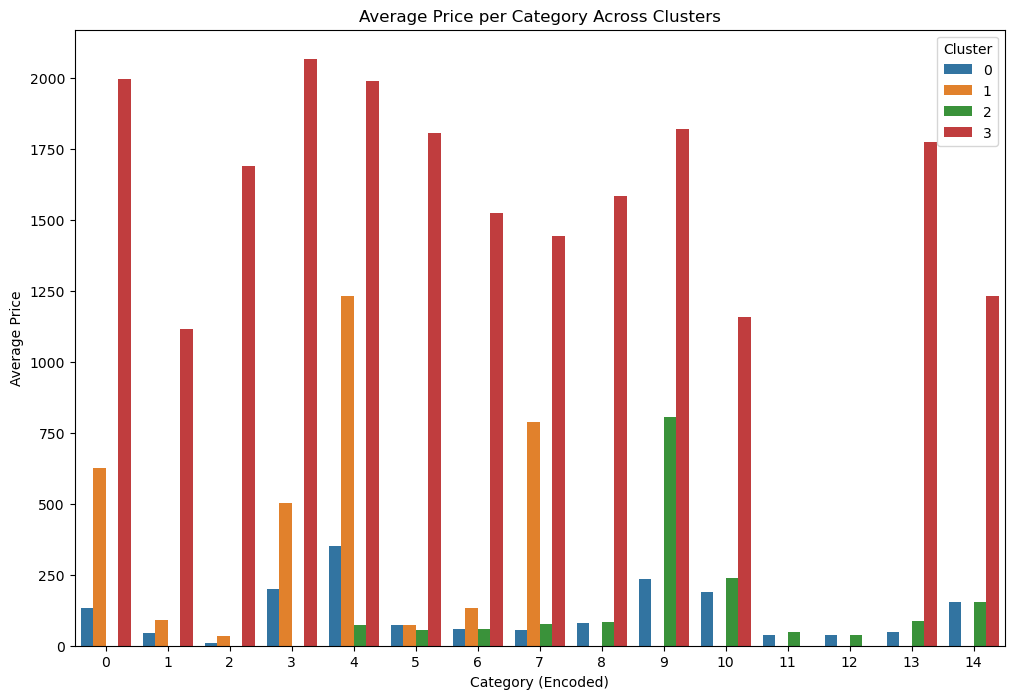

In [27]:
# Grouped bar chart for average values per category per cluster
category_cluster_summary = clustering_data.groupby(['category_encoded', 'Cluster']).mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=category_cluster_summary, x='category_encoded', y='price_x', hue='Cluster', palette='tab10')
plt.title('Average Price per Category Across Clusters')
plt.xlabel('Category (Encoded)')
plt.ylabel('Average Price')
plt.legend(title='Cluster')
plt.show()


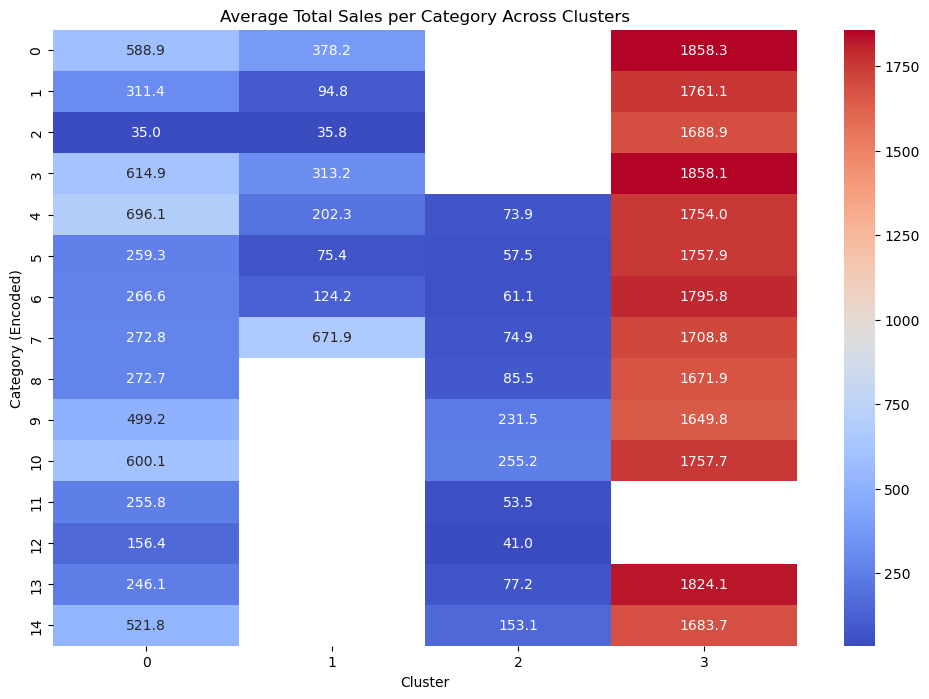

In [29]:
# Heatmap for category vs cluster based on total
heatmap_data = clustering_data.pivot_table(index='category_encoded', columns='Cluster', values='total', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Total Sales per Category Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Category (Encoded)')
plt.show()
